In [1]:
import torch
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib import pyplot, cm
from utilities3 import *


In [2]:
reader = MatReader('df_test_128.mat')
y_test_128 = reader.read_field('sol')

reader.load_file('df_test_64.mat')
y_test_64 = reader.read_field('sol')

reader.load_file('df_devito_128.mat')
y_devito_128 = reader.read_field('sol')

reader.load_file('df_devito_64.mat')
y_devito_64 = reader.read_field('sol')

reader.load_file('df_FNO_results.mat')
resolution = reader.read_field('res').cpu().numpy().tolist()[0]
FNO_times = reader.read_field('time').cpu().numpy().tolist()[0]
FNO_loss = reader.read_field('loss').cpu().numpy().tolist()[0]

In [3]:
# Calculate devito loss for 128 and 64 resolutions
devito_loss = []
mytestloss = LpLoss(size_average=False)

test_l2 = 0.0
for i in range(200):
    y1 = y_test_128[i]
    y1 = y1.reshape(1, 128, 128)
    y2 = y_devito_128[i]
    y2 = y2.reshape(1, 128, 128)
    test_l2 += mytestloss(y2, y1).item()

test_l2 /= 200
devito_loss.append(test_l2)
print("resolution: 128", "Testing Loss:", test_l2)   
    

resolution: 128 Testing Loss: 0.032261630163993686


In [4]:
mytestloss = LpLoss(size_average=False)

for i in range(200):
    y1 = y_test_64[i]
    y1 = y1.reshape(1, 64, 64)
    y2 = y_devito_64[i]
    y2 = y2.reshape(1, 64, 64)
    test_l2 += mytestloss(y2, y1).item()

test_l2 /= 200
devito_loss.append(test_l2)
print("resolution: 64","Testing Loss:", test_l2)   
    

resolution: 64 Testing Loss: 0.05413846774779959


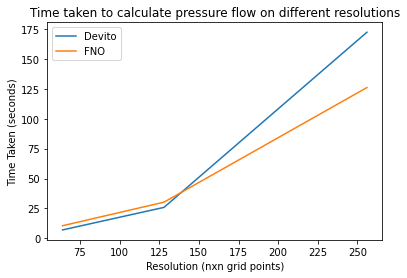

In [5]:
# Plot results to compare time taken and loss 
devito_times = [172.28090240992606, 25.85735517181456, 7.018320901319385]
devito_resolution = [128, 64]
plt.plot(resolution, devito_times, label = "Devito")
plt.plot(resolution, FNO_times, label = "FNO")
plt.xlabel('Resolution (nxn grid points)')
plt.ylabel('Time Taken (seconds)')
plt.title('Time taken to calculate pressure flow on different resolutions')
plt.legend()

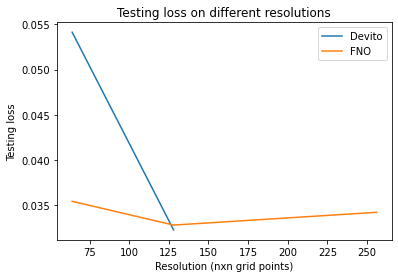

In [6]:
plt.plot(devito_resolution, devito_loss, label = "Devito")
plt.plot(resolution, FNO_loss, label = "FNO")
plt.xlabel('Resolution (nxn grid points)')
plt.ylabel('Testing loss')
plt.title('Testing loss on different resolutions')
plt.legend()